# Hiểu data

## 1. Import dữ liệu

In [1]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from load_data import mimic_missing

In [23]:
dataset = load_dataset("Dingdong-Inc/FreshRetailNet-50K")
data = dataset['train'].to_pandas()

data = data.sort_values(by=['store_id', 'product_id', 'dt'])
horizon=90
series_num = data.shape[0]//horizon

hours_sale = np.array(data['hours_sale'].tolist())
hours_stock_status = np.array(data['hours_stock_status'].tolist())

hours_sale_origin = hours_sale.reshape(series_num*3, 30, 24)[...,6:22]
hours_stock_status = hours_stock_status.reshape(series_num*3, 30, 24)[...,6:22]

hours_sale = np.where(hours_stock_status==1, np.nan, hours_sale_origin)

In [19]:
def stat_original_data(n_samples=500, hours_sale=None):
    if hours_sale is None:
        dataset = load_dataset("Dingdong-Inc/FreshRetailNet-50K")
        data = dataset['train'].to_pandas()

        data = data.sort_values(by=['store_id', 'product_id', 'dt'])
        horizon=90
        series_num = data.shape[0]//horizon

        hours_sale = np.array(data['hours_sale'].tolist())
        hours_stock_status = np.array(data['hours_stock_status'].tolist())

        hours_sale = hours_sale.reshape(series_num*3, 30, 24)[...,6:22]
        hours_stock_status = hours_stock_status.reshape(series_num*3, 30, 24)[...,6:22]
        hours_sale = np.where(hours_stock_status==1, np.nan, hours_sale)
    
    n_samples = min(n_samples, len(hours_sale))
    total_samples = hours_sale.size
    nan_count = np.isnan(hours_sale[:n_samples]).sum()
    print(f"Tỷ lệ nhu cầu bị ẩn do hết hàng: {nan_count * 100 / total_samples:.2f}%")
    
    plt.figure(figsize=(12, 6))
    plt.bar(['Censored', 'Total'], [nan_count, total_samples], color=['orange', 'blue'])
    plt.title(f'Censored vs Total in First {n_samples} Samples')
    plt.ylabel('Count')
    plt.show()
    

Tỷ lệ nhu cầu bị ẩn do hết hàng: 19.88%


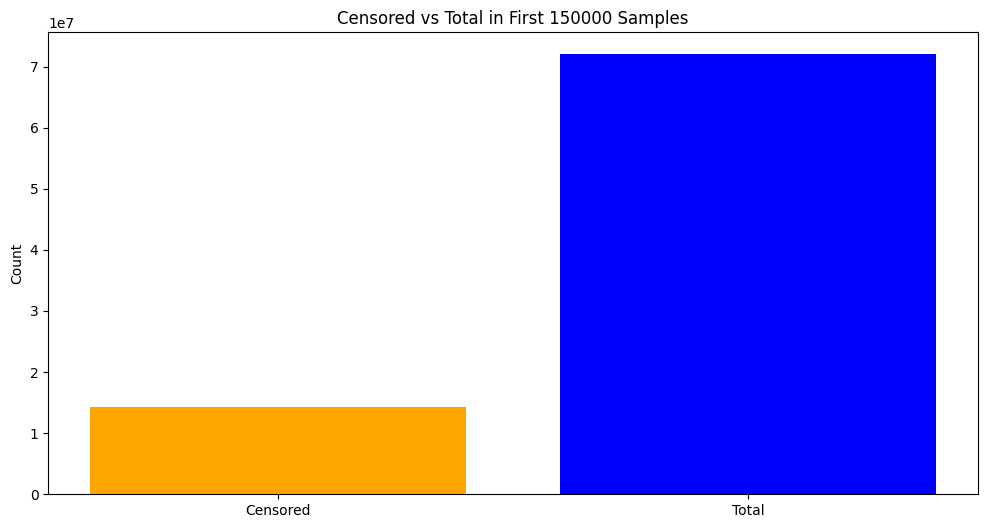

In [20]:
stat_original_data(n_samples=9999999999, hours_sale=hours_sale)

In [21]:
hours_sale, _ = mimic_missing(hours_sale, p=0.3, max_missing_patch=7, min_missing_patch=3)

Tỷ lệ nhu cầu bị ẩn do hết hàng: 32.58%


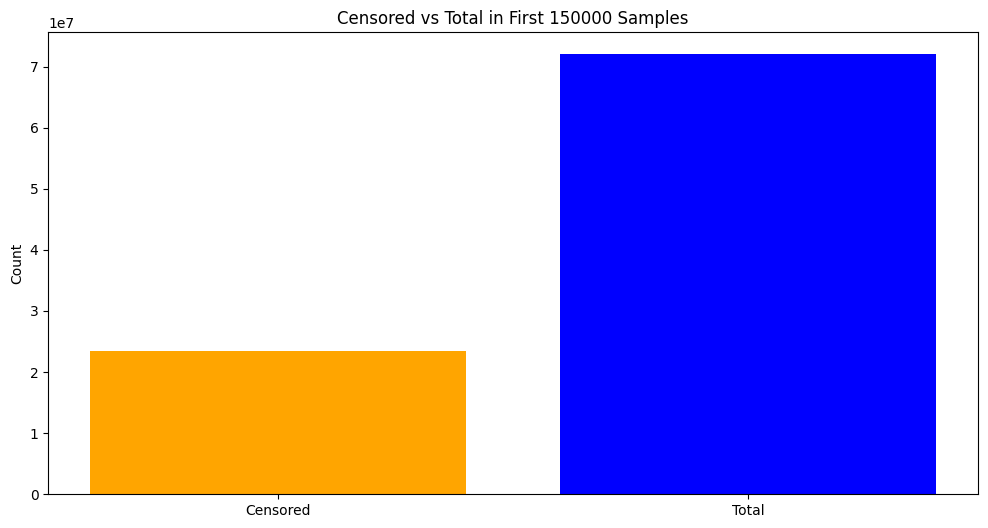

In [22]:
stat_original_data(n_samples=9999999999, hours_sale=hours_sale)

In [25]:
hours_sale_mimic, valid_idx = mimic_missing(hours_sale, p=0.3, max_missing_patch=7, min_missing_patch=3)

In [53]:
print(hours_sale[0][25])
print(hours_sale_mimic[0][25])
print(valid_idx[0][25])

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.3 0.  0.  0.  1. ]
[nan nan nan nan nan nan nan 0.  0.  0.  0.  0.3 0.  0.  0.  1. ]
[ True  True  True  True  True  True  True False False False False False
 False False False False]


In [ ]:
for i in range(100):
    # so sánh 2 array coi NaN = NaN
    if not np.allclose(hours_sale[0][i], hours_sale_mimic[0][i], equal_nan=True):
        print("Sample khác nhau tại index:", i)
        print("Original:", hours_sale[0][i]) 
        print("Mimic   :", hours_sale_mimic[0][i])
        break  # chỉ in sample đầu tiên khác

Sample khác nhau tại index: 25
Original: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.3 0.  0.  0.  1. ]
Mimic   : [nan nan nan nan nan nan nan 0.  0.  0.  0.  0.3 0.  0.  0.  1. ]
